In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

import datetime

In [ ]:
data = pd.read_csv('data.csv', delimiter=',', encoding = "ISO-8859-1")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### There are eight variables in this data collection, including:
- Non-numeric variables include InvoiceNo, StockCode, Description, InvoiceDate, and Country.
- We need to check if there is a negative value for Quantity, UnitPrice, and CustomerID because they are numeric variables.

#                              CHAPTER 2: DATASET PREPARATION

## 2.2 EDA DATA

In [ ]:
#Check for null data
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Drop all the null data
data.dropna(inplace =True)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### VISULAIZE DATA TO GET INSIGHT

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#check for negative values
data[data['Quantity']<0].shape[0], data[data['UnitPrice']<0].shape[0] 

(8905, 0)

Quantity column is included with 8905 null values that need to be droped

In [ ]:
#Drop negative values
data.drop(data[data['Quantity'] < 0].index, inplace = True)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
#Check for null data again
data[data['Quantity']<0].shape[0], data[data['UnitPrice']<0].shape[0] 

(0, 0)

In [ ]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


## conclusion: 
#### Prior to the EDA data, the following data was collected:
- The data collection has 541909 rows, with 1454 null values in the Description variable and 135080 null values in the CustomerID variable. Furthermore, there are 8905 negative values in the Quantity variable that must be deleted.

#### Following the EDA data, the following data set was created:
- The remaining data set has 397924 rows, with the variables Description and CustomerID's initial null values removed. In addition, the original Quantity variable's 8905 negative values have been eliminated.
- The data has been cleaned.

# CHAPTER 3: CUSTOMER SEGMENTATION BASE ON RFM ANALYSIS

## 3.1 CACULATE R, F, M

### Tính R - Recency

In [ ]:
#Check the data type of Invoice Date
data['InvoiceDate'].describe()

count               397924
unique               17286
top       11/14/2011 15:27
freq                   542
Name: InvoiceDate, dtype: object

In [ ]:
# Transform invoice date into datetime
data['InvoiceDate'] = pd.to_datetime( data['InvoiceDate'], format = '%m/%d/%Y %H:%M').dt.date
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


##### Take the large date in InvoiceDate + 1, to be the standard number to subtract the remaining days to get R

In [ ]:
current_date = max(data['InvoiceDate']) + datetime.timedelta(days = 1)

### Calculate M - Moneytary

In [ ]:
data['TotalPay'] = data['Quantity']*data['UnitPrice']
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60


### Tables R, F, M
- R = number of days of greatest purchase + 1 minus number of days of last purchase
- F = calculate the number of times purchased
- M = Total amount purchased

In [ ]:
# Group by CustomerID
df_customers = data.groupby(['CustomerID']).agg(
    {
        'InvoiceDate' : lambda x: (current_date - x.max()).days,
        'InvoiceNo' : 'count',
        'TotalPay' : 'sum'
    }
)
df_customers

,InvoiceDate,InvoiceNo,TotalPay
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [ ]:
df_customers.reset_index(inplace=True)

In [ ]:
df_customers

,CustomerID,InvoiceDate,InvoiceNo,TotalPay
0,12346.0,326,1,77183.60
1,12347.0,3,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40
...,...,...,...,...
4334,18280.0,278,10,180.60
4335,18281.0,181,7,80.82
4336,18282.0,8,12,178.05
4337,18283.0,4,756,2094.88


In [ ]:
# Rename  R, F, M
df_customers.rename(columns = {
    'InvoiceDate' : 'R',
    'InvoiceNo' : 'F',
    'TotalPay' : 'M'
}, inplace = True)
df_customers

,CustomerID,R,F,M
0,12346.0,326,1,77183.60
1,12347.0,3,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40
...,...,...,...,...
4334,18280.0,278,10,180.60
4335,18281.0,181,7,80.82
4336,18282.0,8,12,178.05
4337,18283.0,4,756,2094.88


## 3.2	RFM Segmentation

### 3.2.1 Computing Quantile of RFM values

#### 3.2.1.1

In [ ]:
df_RFM = df_customers

In [ ]:
df_RFM

,CustomerID,R,F,M
0,12346.0,326,1,77183.60
1,12347.0,3,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40
...,...,...,...,...
4334,18280.0,278,10,180.60
4335,18281.0,181,7,80.82
4336,18282.0,8,12,178.05
4337,18283.0,4,756,2094.88


In [ ]:
#Frequency

def FScore(x,p,d):
    if x <= d[p][0.20]:
        return 0
    elif x <= d[p][0.40]:
        return 1
    elif x <= d[p][0.60]: 
        return 2
    elif x <= d[p][0.80]:
        return 3
    else:
        return 4

quantiles = df_RFM.quantile(q=[0.20,0.40,0.60,0.80])
quantiles = quantiles.to_dict()

#Frequency 
df_RFM['F_Rank'] = df_RFM['F'].apply(FScore, args=('F',quantiles,))

#Recency 
df_RFM = df_RFM.sort_values('R',ascending=True)
df_RFM['R_Rank'] = 4 - pd.qcut(df_RFM['R'],5,labels=False)

#Monetary 
df_RFM['M_Rank'] = pd.qcut(df_RFM['M'],5,labels=False)

#Plus 1 in Ranking 
df_RFM['R_Rank'] = df_RFM['R_Rank'] + 1
df_RFM['F_Rank'] = df_RFM['F_Rank'] + 1
df_RFM['M_Rank'] = df_RFM['M_Rank'] + 1

# Add to dataframe
df_RFM['RFM Score'] = df_RFM['R_Rank'].map(str) + df_RFM['F_Rank'].map(str) + df_RFM['M_Rank'].map(str)

df_RFM

,CustomerID,R,F,M,F_Rank,R_Rank,M_Rank,RFM Score
1258,14051.0,1,210,15610.39,5,5,5,555
2201,15344.0,1,26,563.94,2,5,3,523
3824,17581.0,1,440,11045.04,5,5,5,555
1059,13777.0,1,197,25977.16,5,5,5,555
3382,16954.0,1,54,2085.08,3,5,5,535
...,...,...,...,...,...,...,...,...
1393,14237.0,374,9,161.00,1,1,1,111
546,13065.0,374,14,205.86,1,1,1,111
2884,16274.0,374,67,357.95,4,1,2,142
355,12791.0,374,2,192.60,1,1,1,111


#### 3.2.1.2 Summing the RFM Score

In [ ]:
df_RFM['RFM_Sum'] = df_RFM[['F_Rank','R_Rank','M_Rank']].sum(axis=1)
df_RFM.head()

,CustomerID,R,F,M,F_Rank,R_Rank,M_Rank,RFM Score,RFM_Sum
1258,14051.0,1,210,15610.39,5,5,5,555,15
2201,15344.0,1,26,563.94,2,5,3,523,10
3824,17581.0,1,440,11045.04,5,5,5,555,15
1059,13777.0,1,197,25977.16,5,5,5,555,15
3382,16954.0,1,54,2085.08,3,5,5,535,13


In [ ]:
df_RFM.describe()

,CustomerID,R,F,M,F_Rank,R_Rank,M_Rank,RFM_Sum
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.00000,4339.000000
mean,15299.936852,93.041484,91.708689,2053.793018,2.978566,3.006684,3.00000,8.985250
std,1721.889758,100.007757,228.792852,8988.248381,1.429696,1.413138,1.41454,3.589245
min,12346.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,3.000000
25%,13812.500000,18.000000,17.000000,307.245000,2.000000,2.000000,2.00000,6.000000
50%,15299.000000,51.000000,41.000000,674.450000,3.000000,3.000000,3.00000,9.000000
75%,16778.500000,142.500000,100.000000,1661.640000,4.000000,4.000000,4.00000,12.000000
max,18287.000000,374.000000,7847.000000,280206.020000,5.000000,5.000000,5.00000,15.000000


In [ ]:
df_RFM.sort_values(by=['RFM Score', 'M'], ascending=[True, False])

,CustomerID,R,F,M,F_Rank,R_Rank,M_Rank,RFM Score,RFM_Sum
2322,15510.0,331,1,250.00,1,1,1,111,3
2772,16124.0,318,11,249.00,1,1,1,111,3
3056,16510.0,373,13,248.10,1,1,1,111,3
4076,17925.0,373,1,244.08,1,1,1,111,3
2996,16427.0,264,9,241.06,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...
590,13126.0,5,140,2099.64,5,5,5,555,15
4337,18283.0,4,756,2094.88,5,5,5,555,15
915,13571.0,13,341,2092.32,5,5,5,555,15
4161,18044.0,5,127,2088.60,5,5,5,555,15


### 3.2.2  RFM Result Interpretation

#### 3.2.2.2 Making Segmentation For Customers Depends On RFM Sum Score

In [ ]:
# Define label function 
def label(df):
    if df['RFM_Sum'] >= 14:
        return 'Champions'
    elif ((df['RFM_Sum'] >= 12) and (df['RFM_Sum'] < 14)):
        return 'Loyal'
    elif ((df['RFM_Sum'] >= 10) and (df['RFM_Sum'] < 12)):
        return 'Potential'
    elif ((df['RFM_Sum'] >= 8) and (df['RFM_Sum'] < 10)):
        return 'Can\'t Lose Them'
    elif ((df['RFM_Sum'] >= 6) and (df['RFM_Sum'] < 8)):
        return 'Promising'
    elif ((df['RFM_Sum'] >= 4) and (df['RFM_Sum'] < 6)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
    
# Create a new variable called RFM_label

df_RFM['RFM_label'] = df_RFM.apply(label, axis=1)

# Print the header with top 5 rows to the console
df_RFM.head()

,CustomerID,R,F,M,F_Rank,R_Rank,M_Rank,RFM Score,RFM_Sum,RFM_label
1258,14051.0,1,210,15610.39,5,5,5,555,15,Champions
2201,15344.0,1,26,563.94,2,5,3,523,10,Potential
3824,17581.0,1,440,11045.04,5,5,5,555,15,Champions
1059,13777.0,1,197,25977.16,5,5,5,555,15,Champions
3382,16954.0,1,54,2085.08,3,5,5,535,13,Loyal


#### 3.2.2.3 Visualization results

In [ ]:
RFM_result = df_RFM[['CustomerID', 'RFM_label']]
RFM_result.head()

,CustomerID,RFM_label
1258,14051.0,Champions
2201,15344.0,Potential
3824,17581.0,Champions
1059,13777.0,Champions
3382,16954.0,Loyal


In [ ]:
RFM_result = RFM_result.groupby('RFM_label').count()
RFM_result = RFM_result.reset_index()
RFM_result.columns = ['RFM_label', 'Count']
RFM_result

,RFM_label,Count
0,Can't Lose Them,729
1,Champions,607
2,Loyal,655
3,Needs Attention,634
4,Potential,680
5,Promising,763
6,Require Activation,271


Text(0.5, 1.0, 'Customer segment')

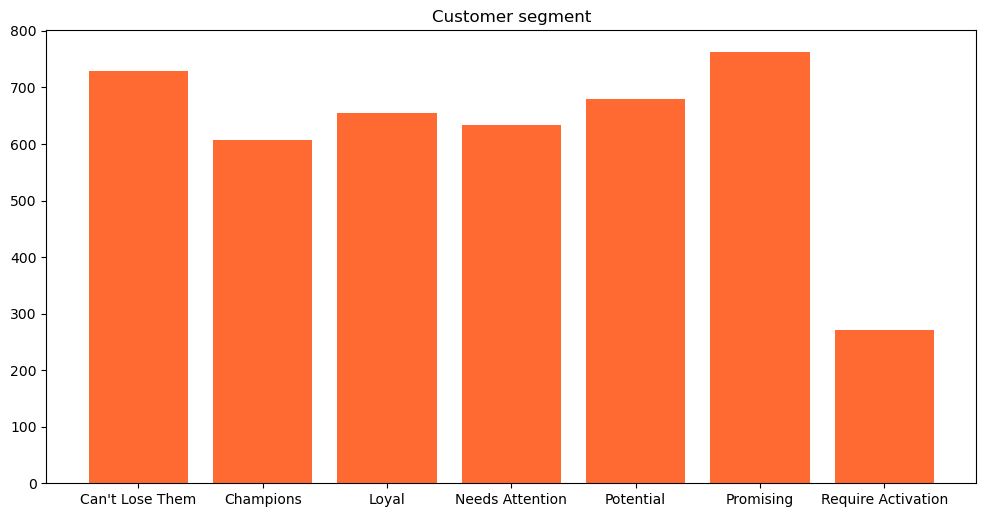

In [ ]:
#Visualize result
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
plt.bar(RFM_result['RFM_label'], RFM_result['Count'], color='orangered', alpha=0.8);
plt.title("Customer segment")

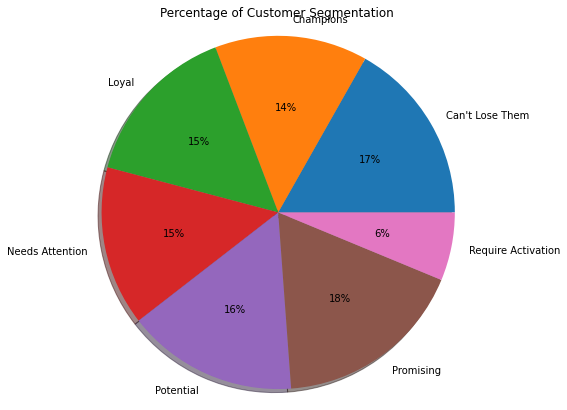

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(RFM_result['Count'], labels=RFM_result.RFM_label, autopct='%.0f%%', shadow=True)
plt.title('Percentage of Customer Segmentation')
plt.axis('equal')
plt.show()

## 3.3 CONCLUSION

In [ ]:
#+ Who are the loyal customers?
# Loyal customers are customers with high frequency and label loyal
df_loyal = df_RFM[(df_RFM['RFM_Sum'] >= 12) & (df_RFM['RFM_Sum'] < 14)].sort_values('M', ascending=False)
df_loyal

,CustomerID,R,F,M,F_Rank,R_Rank,M_Rank,RFM Score,RFM_Sum,RFM_label
2703,16029.0,39,242,81024.84,5,3,5,355,13,Loyal
453,12931.0,22,82,42055.96,4,4,5,445,13,Loyal
4022,17857.0,5,54,26879.04,3,5,5,535,13,Loyal
2922,16333.0,8,45,26626.80,3,5,5,535,13,Loyal
324,12744.0,52,222,21279.29,5,3,5,355,13,Loyal
...,...,...,...,...,...,...,...,...,...,...
3338,16898.0,27,162,508.81,5,4,3,453,12,Loyal
2482,15721.0,12,91,507.08,4,5,3,543,12,Loyal
2952,16368.0,3,76,497.43,4,5,3,543,12,Loyal
2599,15877.0,2,129,493.28,5,5,3,553,13,Loyal


+ Who are the loyal customers?
+ Which customers are at the verge of churning?


In [ ]:
# + Which customers are at the verge of churning?
#Customers who's recency value is low and labeled "Need Attention"
df_churning = df_RFM[(df_RFM['RFM_Sum'] < 6)].sort_values('M', ascending=False)
df_churning

,CustomerID,R,F,M,F_Rank,R_Rank,M_Rank,RFM Score,RFM_Sum,RFM_label
4225,18133.0,213,1,931.50,1,1,3,113,5,Needs Attention
3200,16716.0,267,2,901.20,1,1,3,113,5,Needs Attention
2014,15100.0,334,3,876.00,1,1,3,113,5,Needs Attention
2802,16163.0,233,6,856.60,1,1,3,113,5,Needs Attention
2427,15649.0,337,2,816.00,1,1,3,113,5,Needs Attention
...,...,...,...,...,...,...,...,...,...,...
3324,16878.0,85,3,13.30,1,2,1,211,4,Needs Attention
4099,17956.0,250,1,12.75,1,1,1,111,3,Require Activation
3015,16454.0,45,2,6.90,1,3,1,311,5,Needs Attention
1794,14792.0,64,2,6.20,1,3,1,311,5,Needs Attention


In [ ]:
#Lost customer
df_RFM[df_RFM['RFM Score']== '111'].sort_values('R', ascending=False).head()

,CustomerID,R,F,M,F_Rank,R_Rank,M_Rank,RFM Score,RFM_Sum,RFM_label
1038,13747.0,374,1,79.60,1,1,1,111,3,Require Activation
355,12791.0,374,2,192.60,1,1,1,111,3,Require Activation
546,13065.0,374,14,205.86,1,1,1,111,3,Require Activation
1393,14237.0,374,9,161.00,1,1,1,111,3,Require Activation
2207,15350.0,374,5,115.65,1,1,1,111,3,Require Activation


In [ ]:
df_RFM[df_RFM['RFM Score']== '111'].sort_values('R', ascending=False).count()

CustomerID    271
R             271
F             271
M             271
F_Rank        271
R_Rank        271
M_Rank        271
RFM Score     271
RFM_Sum       271
RFM_label     271
dtype: int64

In [ ]:
#Best customers
df_RFM[df_RFM['RFM Score']== '555'].sort_values('M', ascending=False).head()

,CustomerID,R,F,M,F_Rank,R_Rank,M_Rank,RFM Score,RFM_Sum,RFM_label
1690,14646.0,2,2080,280206.02,5,5,5,555,15,Champions
4202,18102.0,1,431,259657.30,5,5,5,555,15,Champions
3729,17450.0,9,337,194550.79,5,5,5,555,15,Champions
1880,14911.0,2,5677,143825.06,5,5,5,555,15,Champions
1334,14156.0,10,1400,117379.63,5,5,5,555,15,Champions


In [ ]:
df_RFM[df_RFM['RFM Score']== '555'].sort_values('M', ascending=False).count()

CustomerID    306
R             306
F             306
M             306
F_Rank        306
R_Rank        306
M_Rank        306
RFM Score     306
RFM_Sum       306
RFM_label     306
dtype: int64

# CHAPTER 4: CUSTOMER SEGMENTATION BASE ON K-MEAN

## 4.1 NORMALIZING DATA RFM 

### EDA RFM DATA

In [ ]:
df_customers.drop('F_Rank', inplace = True, axis =1 )

In [ ]:
df_customers

,CustomerID,R,F,M
0,12346.0,326,1,77183.60
1,12347.0,3,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40
...,...,...,...,...
4334,18280.0,278,10,180.60
4335,18281.0,181,7,80.82
4336,18282.0,8,12,178.05
4337,18283.0,4,756,2094.88


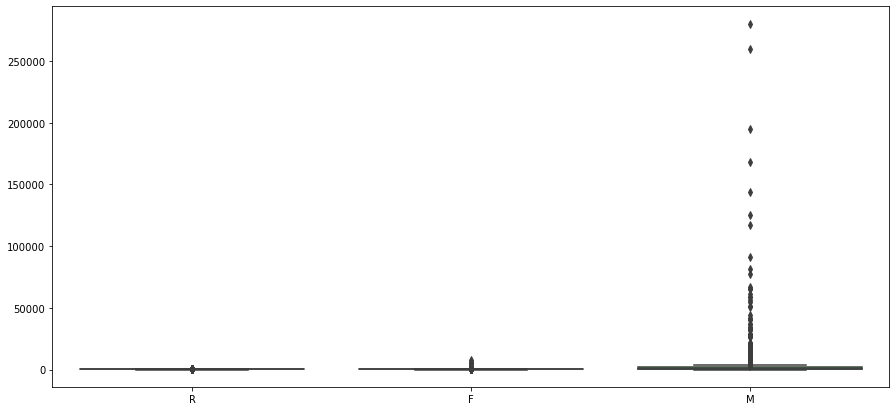

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df_customers[['R','F','M']])
plt.show()

In [ ]:
#Remove outlier (IQR method)
IQR= df_customers['M'].quantile(0.75)-df_customers['M'].quantile(0.25)
lower_limit= df_customers['M'].quantile(0.25) - 1.5*IQR
upper_limit= df_customers['M'].quantile(0.75) + 1.5*IQR
k=df_customers[df_customers['M']>upper_limit]
m=df_customers[df_customers['M']<lower_limit]
df_new=df_customers[(df_customers['M']<upper_limit) & (df_customers['M']>lower_limit)]

print('Data shape before removing outlier',df_customers.shape)
print('Data shape after removing outlier',df_new.shape)
print('Total number of outlier:',len(k)+len(m))

Data shape before removing outlier (4339, 4)
Data shape after removing outlier (3912, 4)
Total number of outlier: 427


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


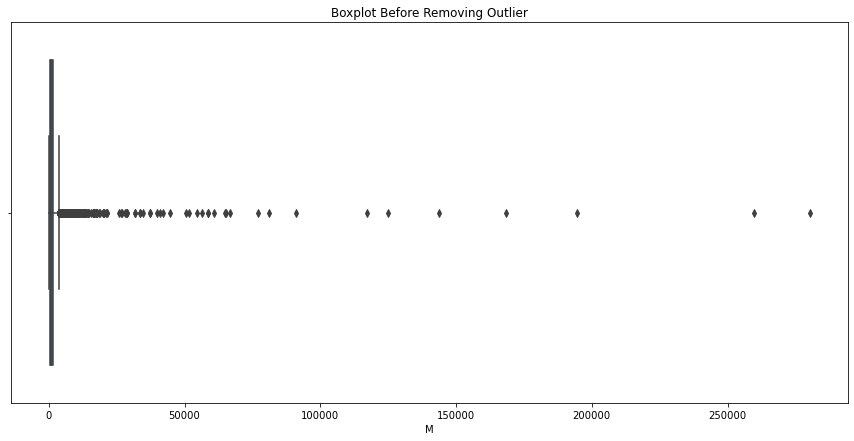

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


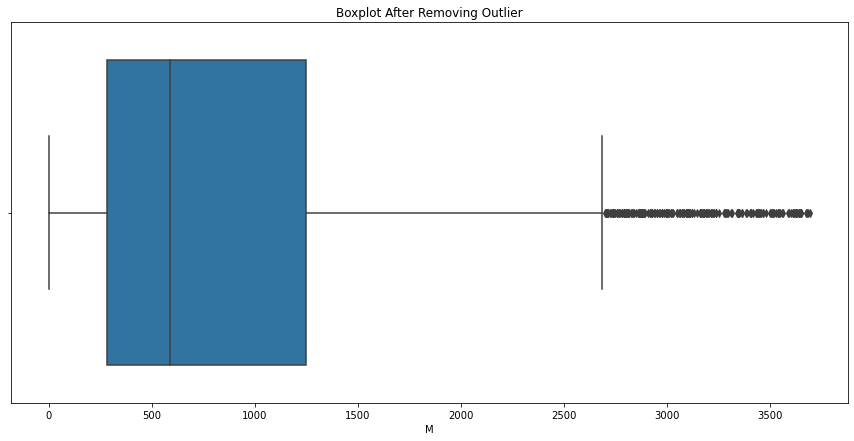

In [ ]:
#Visualize outliers
plt.figure(figsize=(15,7))
sns.boxplot(df_customers['M'])
plt.title('Boxplot Before Removing Outlier')
plt.show()

plt.figure(figsize=(15,7))
sns.boxplot(df_new['M'])
plt.title('Boxplot After Removing Outlier')
plt.show()

In [ ]:
df_new = df_new.reset_index(drop = True)
df_new

,CustomerID,R,F,M
0,12348.0,76,31,1797.24
1,12349.0,19,73,1757.55
2,12350.0,311,17,334.40
3,12352.0,37,85,2506.04
4,12353.0,205,4,89.00
...,...,...,...,...
3907,18280.0,278,10,180.60
3908,18281.0,181,7,80.82
3909,18282.0,8,12,178.05
3910,18283.0,4,756,2094.88


### DATA DISTRIBUTION 

Text(0.5, 1.0, 'Distribution of Recency')

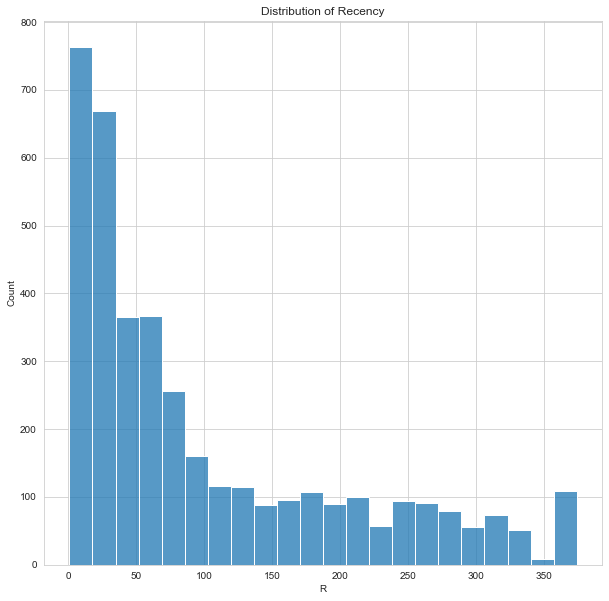

In [ ]:
# Draw distribution
# Recency
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
sns.histplot(df_new['R'])
plt.title("Distribution of Recency")

### The graph of the distribution of Recency values is skewed to the left

Text(0.5, 1.0, 'Distribution of Frequency')

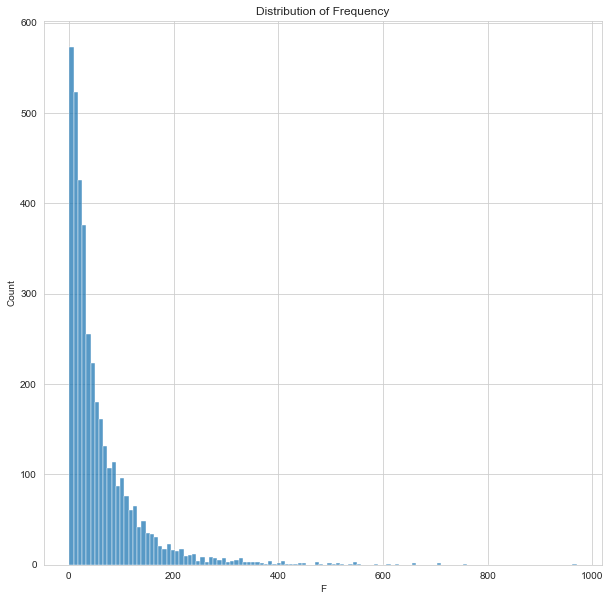

In [ ]:
#Frequency
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
sns.histplot(df_new['F'])
plt.title("Distribution of Frequency")

### The graph of the distribution of Frequency values is skewed to the left

Text(0.5, 1.0, 'Distribution of Monetary')

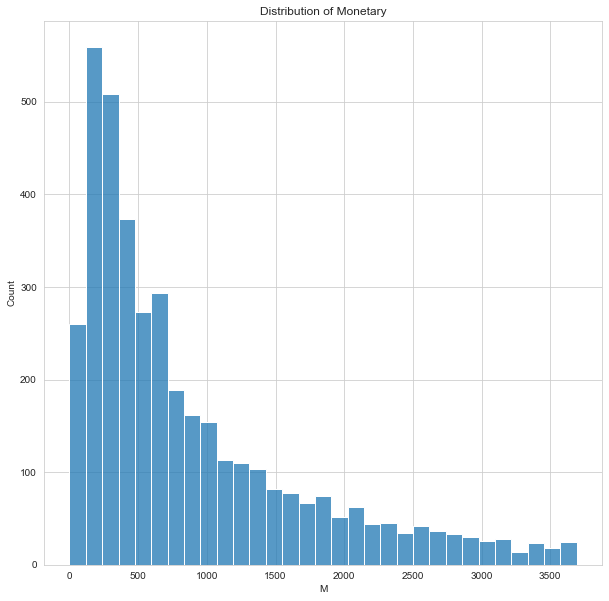

In [ ]:
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
sns.histplot(df_new['M'])
plt.title("Distribution of Monetary")

### The graph of the distribution of Recency values is skewed to the left

#### To effectively segment customers based on the K-means model, we need to consider and transform the Recency, Frequency, and Monetary data into a normal distribution.

#### Choose log, sqrt, boxcox, to conduct distribution transformation test

In [ ]:
df_new.describe()

,CustomerID,R,F,M
count,3912.000000,3912.000000,3912.000000,3912.000000
mean,15337.051125,100.393661,61.505624,886.427887
std,1706.813905,101.570591,77.308601,828.553109
min,12348.000000,1.000000,1.000000,0.000000
25%,13866.750000,23.000000,15.000000,283.422500
50%,15347.500000,59.000000,35.000000,588.175000
75%,16805.250000,158.000000,79.000000,1246.155000
max,18287.000000,374.000000,970.000000,3692.280000


In [ ]:
df_new.shape

(3912, 4)

##### Dòng dữ liệu của cột M xuất hiện giá trị 0 => không thể thực hiện boxcox => tiến hành loại bỏ dòng dữ liệu đó

In [ ]:
df_new[(df_new.values == 0).any(axis=1)].index.values.tolist()

[574]

In [ ]:
df_new_customer = df_new.drop(df_new.index[574])
df_new_customer

,CustomerID,R,F,M
0,12348.0,76,31,1797.24
1,12349.0,19,73,1757.55
2,12350.0,311,17,334.40
3,12352.0,37,85,2506.04
4,12353.0,205,4,89.00
...,...,...,...,...
3907,18280.0,278,10,180.60
3908,18281.0,181,7,80.82
3909,18282.0,8,12,178.05
3910,18283.0,4,756,2094.88


In [ ]:
# Kiểm tra lại xem còn giá trị 0 
df_new_customer.describe()

,CustomerID,R,F,M
count,3911.000000,3911.000000,3911.000000,3911.000000
mean,15337.583227,100.415495,61.521094,886.654537
std,1706.707613,101.574396,77.312430,828.537759
min,12348.000000,1.000000,1.000000,3.750000
25%,13867.500000,23.000000,15.000000,283.510000
50%,15348.000000,59.000000,35.000000,588.220000
75%,16805.500000,158.000000,79.000000,1246.210000
max,18287.000000,374.000000,970.000000,3692.280000


In [ ]:
# Tạo function thử nghiệm phương thức log, sqrt, boxcox 
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(10,10))
    sns.histplot(df_new_customer[x], ax=ax[0,0])
    sns.histplot(np.log(df_new_customer[x]), ax=ax[0,1])
    sns.histplot(np.sqrt(df_new_customer[x]), ax=ax[1,0])
    sns.histplot(stats.boxcox(df_new_customer[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(df_new_customer[x].skew().round(2))
    print(np.log(df_new_customer[x]).skew().round(2))
    print(np.sqrt(df_new_customer[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_new_customer[x])[0]).skew().round(2))

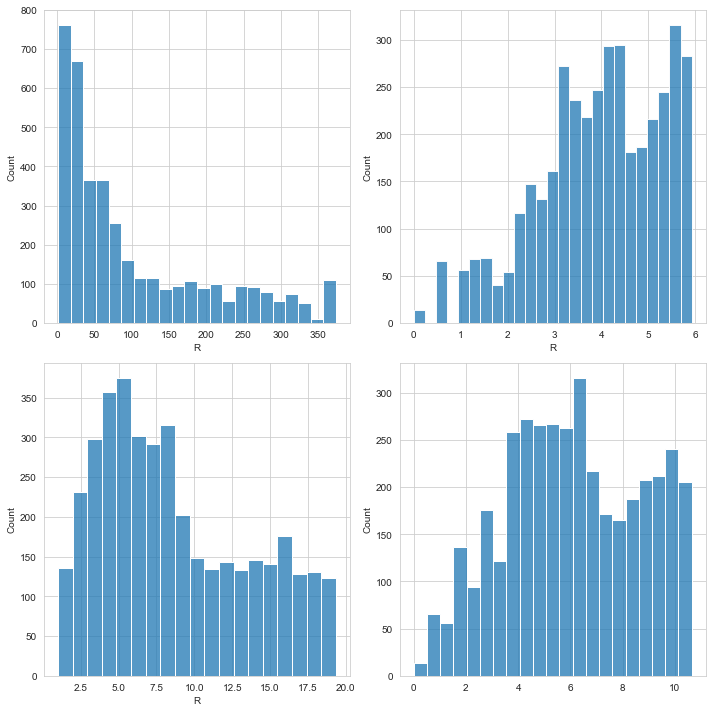

1.13
-0.52
0.52
-0.07


In [ ]:
analyze_skewness('R')

##### Model 4 has a skewness close to 0, so model 4 has the best normal distribution

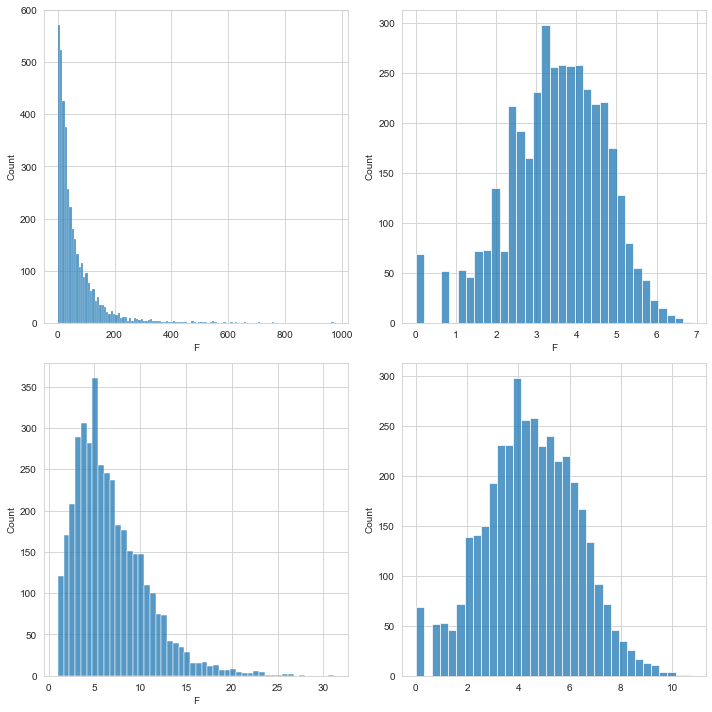

3.47
-0.43
1.27
-0.01


In [ ]:
analyze_skewness('F')

##### Model 4 has a skewness close to 0, so model 4 has the best normal distribution

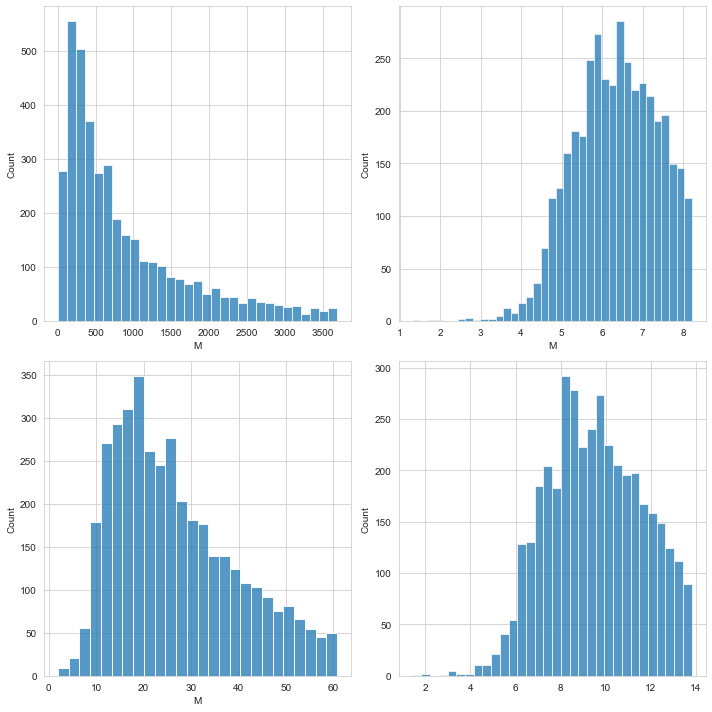

1.39
-0.3
0.68
-0.02


In [ ]:
analyze_skewness('M')


##### Model 4 has a skewness close to 0, so model 4 has the best normal distribution

### Transform

In [ ]:
#Use Boxcox to transform non-normally distributed dataset into a more normally distributed one. 
df_transform = pd.DataFrame()
df_transform['R'] = stats.boxcox(df_new_customer['R'])[0]
df_transform['F'] = stats.boxcox(df_new_customer['F'])[0]
df_transform['M'] = stats.boxcox(df_new_customer['M'])[0]
df_transform

,R,F,M
0,6.584413,4.264385,12.011665
1,3.893164,5.636416,11.957924
2,10.110733,3.383964,8.334182
3,5.102680,5.895564,12.828605
4,8.972164,1.510306,5.909015
...,...,...,...
3906,9.795776,2.658189,7.158576
3907,8.648407,2.196066,5.746663
3908,2.526643,2.902287,7.132431
3909,1.576454,10.199196,12.384277


In [ ]:
#Scale data to make data points generalized so that the distance between them will be lower.
scaler = StandardScaler()
scaler.fit(df_transform)
df_transform = scaler.transform(df_transform)

In [ ]:
# Display scaled data in dataframe
df_transform = pd.DataFrame(df_transform)
df_transform.columns=['R','F','M']
df_transform

,R,F,M
0,0.189113,-0.124111,1.174793
1,-0.845381,0.627792,1.149396
2,1.544603,-0.606601,-0.563069
3,-0.380453,0.769811,1.560853
4,1.106946,-1.633406,-1.709127
...,...,...,...
3906,1.423536,-1.004342,-1.118624
3907,0.982496,-1.257595,-1.785849
3908,-1.370661,-0.870571,-1.130979
3909,-1.735906,3.128295,1.350878


## 4.2 K-means Clusters: Elbow Method

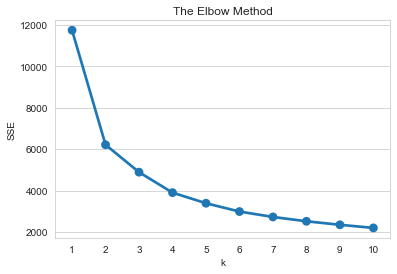

In [ ]:
#Select k through Elbow

sse={}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_transform)
    sse[k] = kmeans.inertia_
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

According to the Elbow chart above, the group decided on the number of clusters k to be three. The clusters will now be plotted to show how the data is spread.

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_transform)

KMeans(n_clusters=3, random_state=42)

In [ ]:
df_new_customer['Cluster']=model.labels_
df_new_customer

,CustomerID,R,F,M,Cluster
0,12348.0,76,31,1797.24,1
1,12349.0,19,73,1757.55,1
2,12350.0,311,17,334.40,0
3,12352.0,37,85,2506.04,1
4,12353.0,205,4,89.00,0
...,...,...,...,...,...
3907,18280.0,278,10,180.60,0
3908,18281.0,181,7,80.82,0
3909,18282.0,8,12,178.05,2
3910,18283.0,4,756,2094.88,1


In [ ]:
df_new_customer.describe()

,CustomerID,R,F,M,Cluster
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,15337.583227,100.415495,61.521094,886.654537,1.007926
std,1706.707613,101.574396,77.312430,828.537759,0.798136
min,12348.000000,1.000000,1.000000,3.750000,0.000000
25%,13867.500000,23.000000,15.000000,283.510000,0.000000
50%,15348.000000,59.000000,35.000000,588.220000,1.000000
75%,16805.500000,158.000000,79.000000,1246.210000,2.000000
max,18287.000000,374.000000,970.000000,3692.280000,2.000000


In [ ]:
df_new_customer.groupby('Cluster').agg(
{
    'R':'mean',
    'F':'mean',
    'M':'mean'
}).round(2)

,R,F,M
Cluster,,,
0,221.84,19.55,341.83
1,45.47,126.24,1713.12
2,43.85,29.58,487.41


#### Cluster 0, long-ago purchase with a small number of invoices and a small value
#### Cluster 1, recently purchased with a large number of bills and great value
#### Cluster 2, recently purchased with a small number of bills and medium value

## 4.3 Visualize the clusters with scaled data

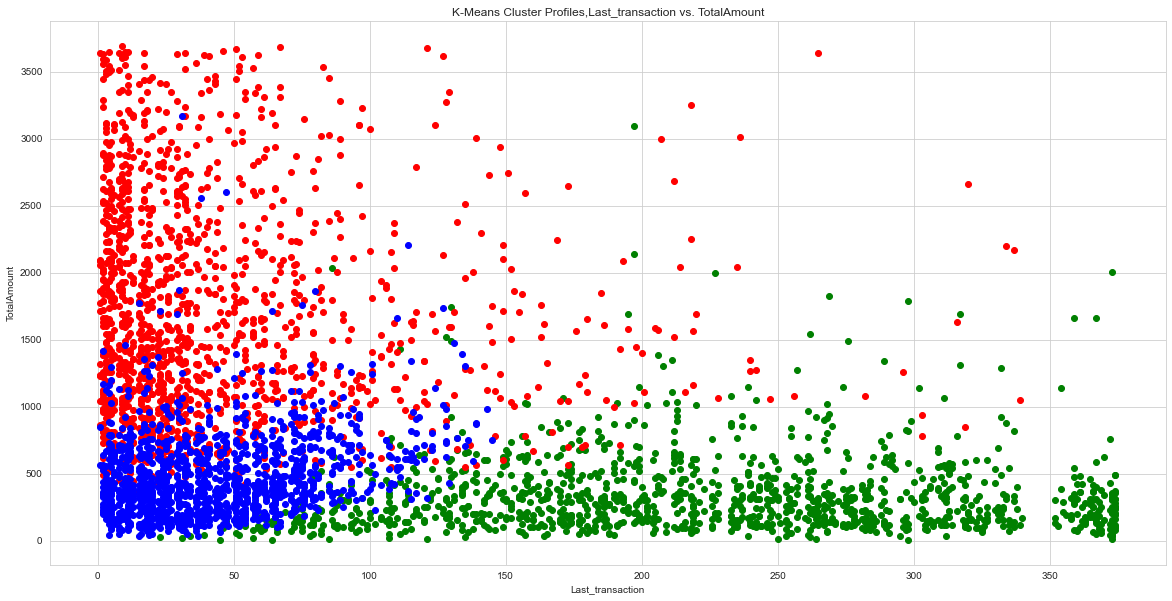

In [ ]:
# Visualize the clusters with original data

df1 = df_new_customer[df_new_customer.Cluster==0]
df2 = df_new_customer[df_new_customer.Cluster==1]
df3 = df_new_customer[df_new_customer.Cluster==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.R,df1['M'],color='green')
plt.scatter(df2.R,df2['M'],color='red')
plt.scatter(df3.R,df3['M'],color='blue')
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

#### The K-Means model segments the data into distinct clusters based on customer's Recency and Monetary.

- Cluster 0 consists of customers with the last_transaction between 20 and 380 days, and total amount spent between 0 tto 2000; 

- Cluster 1 consist of customers with the last_transaction between 0 and 310 days, and total amount spent between $500 and $3800;

- Cluster 2 consits of custoemrs with the last_transaction between 0 and 150 days, and total amount spent between  0 to $3000

In [ ]:
df_transform['Cluster']=model.labels_
df_transform

,R,F,M,Cluster
0,0.189113,-0.124111,1.174793,1
1,-0.845381,0.627792,1.149396,1
2,1.544603,-0.606601,-0.563069,0
3,-0.380453,0.769811,1.560853,1
4,1.106946,-1.633406,-1.709127,0
...,...,...,...,...
3906,1.423536,-1.004342,-1.118624,0
3907,0.982496,-1.257595,-1.785849,0
3908,-1.370661,-0.870571,-1.130979,2
3909,-1.735906,3.128295,1.350878,1


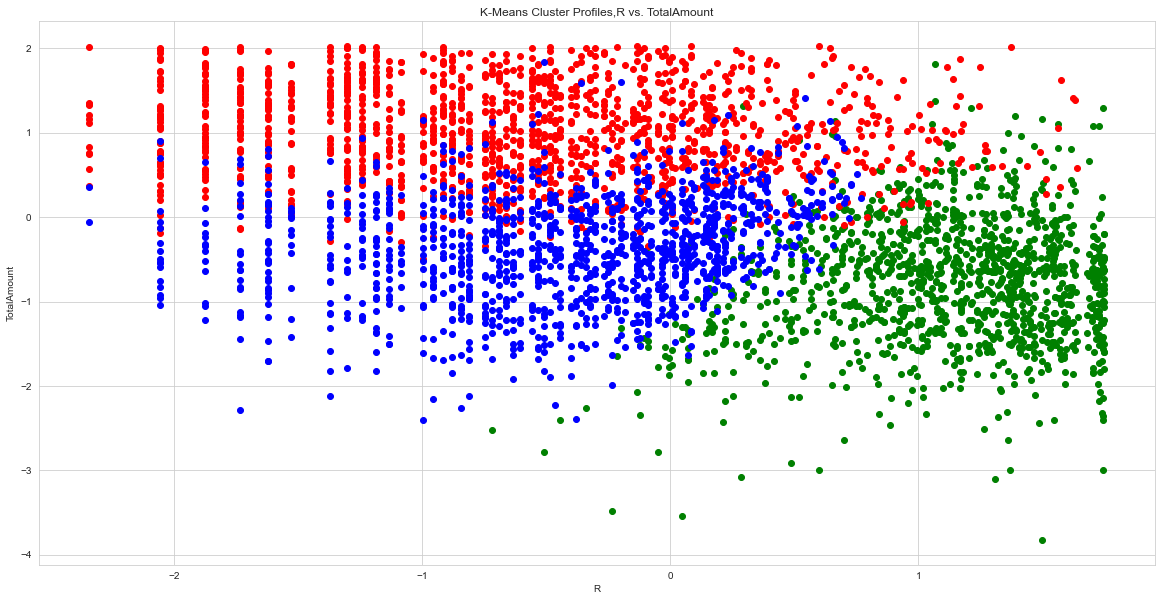

In [ ]:
# Visualize the clusters with scaled data:
df1 = df_transform[df_transform.Cluster==0]
df2 = df_transform[df_transform.Cluster==1]
df3 = df_transform[df_transform.Cluster==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.R,df1['M'],color='green')
plt.scatter(df2.R,df2['M'],color='red')
plt.scatter(df3.R,df3['M'],color='blue')
plt.xlabel('R')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,R vs. TotalAmount')
plt.show()

C:\Users\Admin\AppData\Local\Temp/ipykernel_31728/2763879595.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
C:\Users\Admin\AppData\Local\Temp/ipykernel_31728/2763879595.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=labels.astype(np.float),


Text(0.5, 0.92, 'K Means')

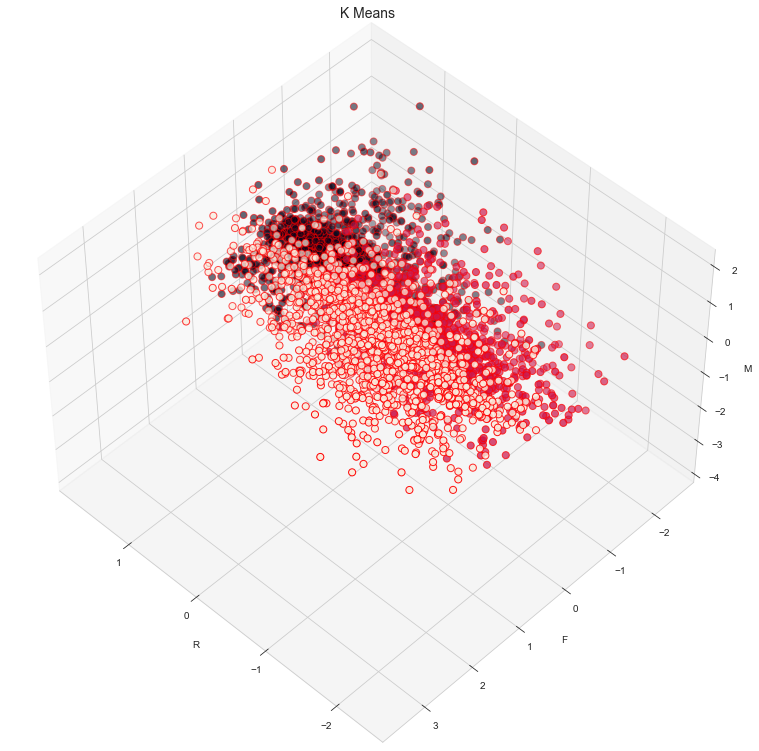

In [ ]:
#KMeans Clusters with 3 Clusters
model = KMeans(n_clusters=3)
model.fit(df_transform)
model.predict(df_transform)
labels = model.labels_
#Plotting
fig = plt.figure(1, figsize=(20,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(df_transform['R'], 
           df_transform['F'], 
           df_transform['M'],
          c=labels.astype(np.float), 
           edgecolor="r", s=50)
ax.set_xlabel("R")
ax.set_ylabel("F")
ax.set_zlabel("M")
plt.title("K Means", fontsize=14)

## Conclusion

In [ ]:
Cluster_result = df_new_customer[['CustomerID', 'Cluster']]
Cluster_result = Cluster_result.groupby('Cluster').count()
Cluster_result = Cluster_result.reset_index()
Cluster_result.columns = ['Cluster', 'Count']
Cluster_result

,Cluster,Count
0,0,1230
1,1,1420
2,2,1261


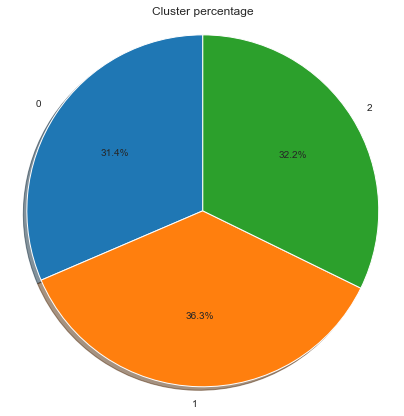

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(Cluster_result['Count'], labels = Cluster_result.Cluster, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Cluster percentage')
plt.axis('equal')
plt.show()

In [ ]:
Cluster_revenue = df_new_customer[['Cluster', 'M']]
Cluster_revenue = Cluster_revenue.groupby(by=['Cluster'])['M'].sum()
Cluster_revenue = Cluster_revenue.reset_index()
Cluster_revenue.columns = ['Cluster', 'Revenue']
Cluster_revenue

,Cluster,Revenue
0,0,420456.360
1,1,2432627.151
2,2,614622.383


In [ ]:
total_revenue = Cluster_revenue.Revenue.sum()
total_revenue

3467705.894

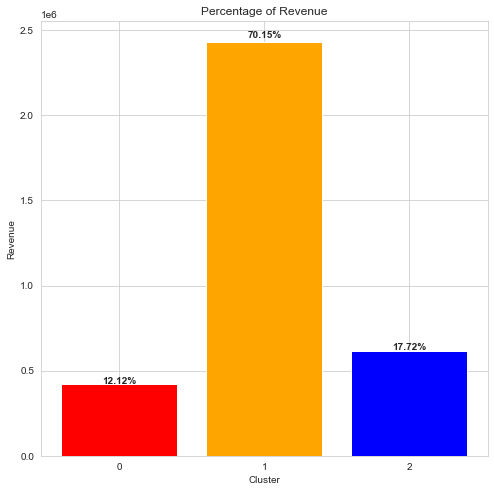

In [ ]:
percentage = []
for i in range(Cluster_revenue.shape[0]):
    pct = (Cluster_revenue.Revenue[i] / total_revenue) * 100
    percentage.append(round(pct,2))
Cluster_revenue['Percentage'] = percentage
 
plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue']
graph = plt.bar(Cluster_revenue.Cluster.apply(str), Cluster_revenue.Revenue, color = colors_list)

plt.xlabel('Cluster')
plt.ylabel('Revenue')
plt.title('Percentage of Revenue')

 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(Cluster_revenue.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

In [ ]:
df_cluster0 = df_new_customer[df_new_customer.Cluster==0]
df_cluster0.describe()

,CustomerID,R,F,M,Cluster
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.0
mean,15376.308943,221.844715,19.551220,341.834439,0.0
std,1715.358498,85.440206,17.734234,292.383046,0.0
min,12350.000000,23.000000,1.000000,3.750000,0.0
25%,13879.000000,158.000000,7.000000,151.767500,0.0
50%,15368.500000,219.000000,14.000000,271.145000,0.0
75%,16833.500000,285.000000,26.000000,430.492500,0.0
max,18281.000000,374.000000,132.000000,3096.000000,0.0


In [ ]:
df_cluster1 = df_new_customer[df_new_customer.Cluster==1]
df_cluster1.describe()

,CustomerID,R,F,M,Cluster
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.0
mean,15282.690845,45.469014,126.242254,1713.117712,1.0
std,1694.066684,51.401127,96.114649,804.286130,0.0
min,12348.000000,1.000000,10.000000,360.930000,1.0
25%,13845.000000,11.000000,68.000000,1064.040000,1.0
50%,15243.000000,27.000000,101.000000,1546.265000,1.0
75%,16770.250000,60.000000,149.000000,2248.667500,1.0
max,18287.000000,339.000000,970.000000,3692.280000,1.0


In [ ]:
df_cluster2 = df_new_customer[df_new_customer.Cluster==2]
df_cluster2.describe()

,CustomerID,R,F,M,Cluster
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.0
mean,15361.623315,43.846154,29.577320,487.408710,2.0
std,1712.184125,30.357031,19.398489,315.117035,0.0
min,12358.000000,1.000000,1.000000,35.400000,2.0
25%,13894.000000,19.000000,15.000000,263.210000,2.0
50%,15414.000000,38.000000,27.000000,415.250000,2.0
75%,16816.000000,65.000000,40.000000,653.380000,2.0
max,18282.000000,145.000000,121.000000,3166.400000,2.0
